In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.utils import resample

#from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

In [2]:
os.chdir("C:/Users/TANMAY/Desktop/exl_data_science")
path_data = os.getcwd()
df = pd.read_csv('churn.csv')

In [3]:
df.duplicated().value_counts()

False    147498
True       2502
dtype: int64

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.duplicated().value_counts()

False    147498
dtype: int64

In [6]:
df.describe()

,Churn,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
count,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000
mean,0.067194,0.301473,52.300085,1.026963,0.749508,7687.834466,5.258315,0.301310
std,0.250359,0.330363,14.710888,1.108859,1.111023,3539.105870,2.167324,0.200009
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.031072,41.000000,0.000000,0.000000,5700.000000,3.000000,0.178393
50%,0.000000,0.154835,52.000000,1.000000,0.000000,6357.000000,5.000000,0.274502
75%,0.000000,0.500162,63.000000,2.000000,1.000000,9166.000000,7.000000,0.386703
max,1.000000,1.000000,109.000000,14.000000,10.000000,25000.000000,9.000000,1.050000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147498 entries, 0 to 149998
Data columns (total 8 columns):
Churn                 147498 non-null int64
utilization           147498 non-null float64
Age                   147498 non-null int64
Num_loans             147498 non-null int64
Num_dependents        147498 non-null int64
MonthlyIncome         147498 non-null int64
Num_Savings_Acccts    147498 non-null int64
DebtRatio             147498 non-null float64
dtypes: float64(2), int64(6)
memory usage: 10.1 MB


In [8]:
df.reset_index(inplace = True , drop = True)
df.head(20)

,Churn,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
0,1,0.766127,45,6,2,9120,2,0.852982
1,0,0.957151,40,0,1,4600,2,0.121876
2,0,0.658180,38,0,0,5042,2,0.085113
3,0,0.233810,30,0,0,5300,2,0.036050
4,0,0.907239,49,1,0,6357,2,0.024926
5,0,0.213179,74,1,1,5500,2,0.375607
6,0,0.305682,57,3,0,6357,2,0.274502
7,0,0.754464,39,0,0,5500,2,0.209940
8,0,0.116951,27,0,0,6357,2,0.274502
9,0,0.189169,57,4,2,6357,2,0.606291


In [9]:
df.isnull().sum()

Churn                 0
utilization           0
Age                   0
Num_loans             0
Num_dependents        0
MonthlyIncome         0
Num_Savings_Acccts    0
DebtRatio             0
dtype: int64

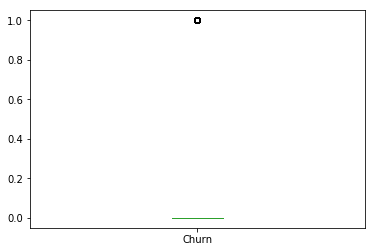

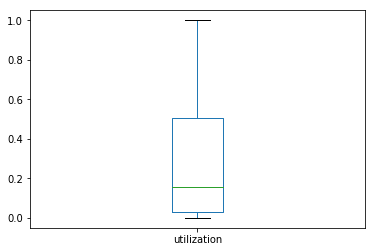

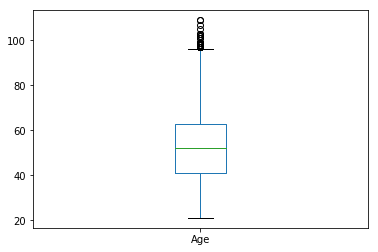

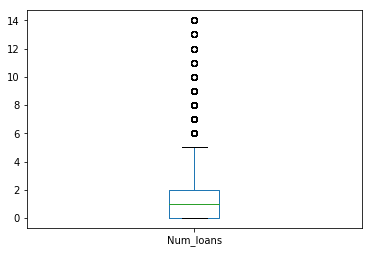

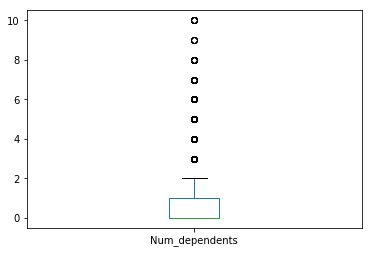

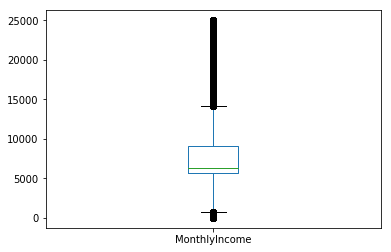

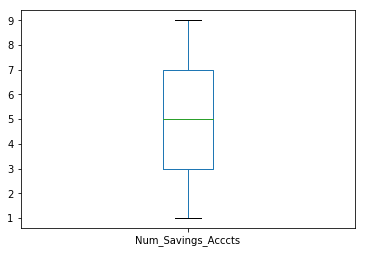

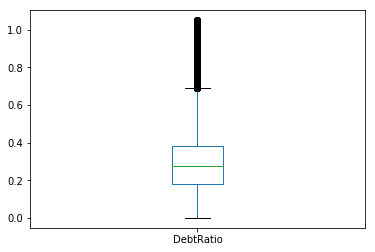

In [18]:
for col in df.columns:
    plt.figure()
    df[col].plot(kind = 'box')

In [10]:
df['Churn'].value_counts()


0    137587
1      9911
Name: Churn, dtype: int64

In [11]:
cnames = ["utilization","Age","Num_loans","Num_dependents","MonthlyIncome","Num_Savings_Acccts","DebtRatio" ]

In [12]:
for i in cnames:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

utilization
Age
Num_loans
Num_dependents
MonthlyIncome
Num_Savings_Acccts
DebtRatio


In [13]:
df.describe()

,Churn,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
count,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000,147498.000000
mean,0.067194,0.301473,0.355683,0.073355,0.074951,0.307486,0.532289,0.286961
std,0.250359,0.330363,0.167169,0.079204,0.111102,0.141570,0.270916,0.190485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031072,0.227273,0.000000,0.000000,0.227969,0.250000,0.169898
50%,0.000000,0.154835,0.352273,0.071429,0.000000,0.254250,0.500000,0.261430
75%,0.000000,0.500162,0.477273,0.142857,0.100000,0.366615,0.750000,0.368288
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


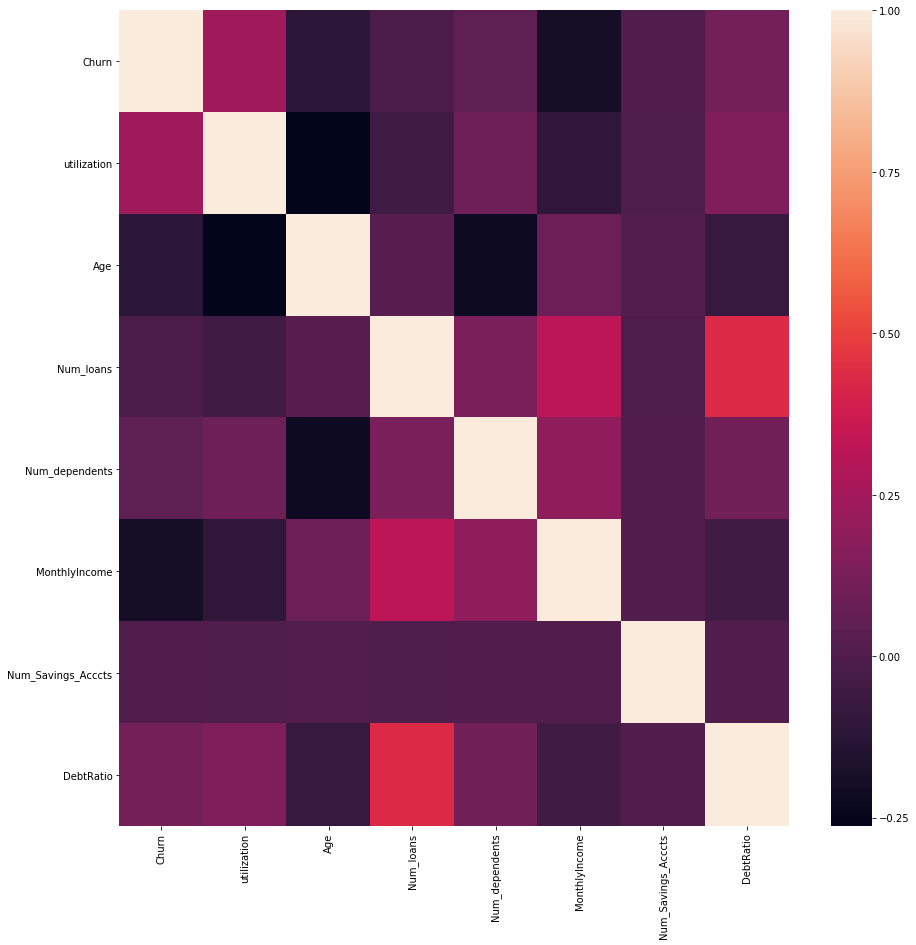

In [14]:
corr_matrix = df.corr()
plot = plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix) # seaborn Library
plt.show()

(array([8.9180e+03, 2.5920e+03, 1.5810e+03, 1.0780e+03, 9.3500e+02,
        8.7200e+02, 1.2910e+03, 1.0970e+03, 1.0150e+03, 1.1710e+03,
        1.1280e+03, 1.1450e+03, 1.1760e+03, 1.1560e+03, 1.2160e+03,
        1.3050e+03, 1.2120e+03, 1.3410e+03, 1.2950e+03, 1.3910e+03,
        1.3580e+03, 1.4700e+03, 1.4360e+03, 1.4290e+03, 1.5550e+03,
        1.4070e+03, 1.5340e+03, 1.5160e+03, 1.5250e+03, 1.5980e+03,
        1.5640e+03, 1.4990e+03, 1.6140e+03, 1.6000e+03, 1.5780e+03,
        3.4434e+04, 1.5230e+03, 1.5480e+03, 1.5110e+03, 1.5180e+03,
        1.5260e+03, 1.5230e+03, 3.7510e+03, 1.4270e+03, 1.4280e+03,
        1.3300e+03, 1.3820e+03, 1.3430e+03, 1.3730e+03, 1.2980e+03,
        1.2780e+03, 1.1610e+03, 1.1830e+03, 1.1880e+03, 1.1690e+03,
        1.0190e+03, 1.0620e+03, 1.0740e+03, 1.0120e+03, 1.0160e+03,
        9.7000e+02, 9.3900e+02, 9.5200e+02, 8.8300e+02, 8.3100e+02,
        7.9800e+02, 8.2200e+02, 7.5500e+02, 6.9400e+02, 6.9400e+02,
        6.6400e+02, 6.4800e+02, 6.3600e+02, 6.03

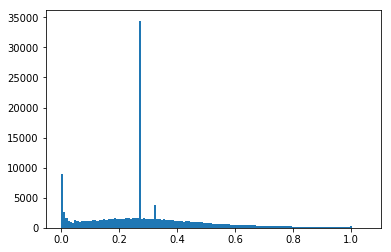

In [32]:
%matplotlib inline  
plt.hist(df['DebtRatio'], bins='auto')

In [15]:
df_mj=df[df.Churn==0]
df_mi=df[df.Churn==1]

In [16]:
df_mi_up=resample(df_mi, replace=True , n_samples=137587 ,random_state=3)

In [17]:
df_up= pd.concat([df_mj,df_mi_up])

In [18]:
df_up.Churn.value_counts()

1    137587
0    137587
Name: Churn, dtype: int64

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [19]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

C:\Users\TANMAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
#Divide data into train and test
X = df_up.values[:, 1:8]
Y = df_up.values[:,0]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3 , random_state=3)

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 80).fit(X_train, y_train)

In [26]:
RF_Predictions = RF_model.predict(X_test)

In [27]:
#build confusion matrix
from sklearn.metrics import confusion_matrix 
#CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)
print(CM)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

#Accuracy: 88
#FNR: 67

col_0    0.0    1.0
row_0              
0.0    40705    616
1.0        0  41232
99.25381270214287
0.0


In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_model, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.9916675707192697
0.0003637022392059289


In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_